In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(type(x_train))
print(x_train.dtype)

<class 'numpy.ndarray'>
uint8


In [7]:
x_train=x_train.astype('float32')/255.0

x_test=x_test.astype('float32')/255.0


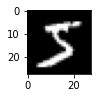

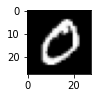

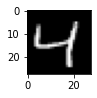

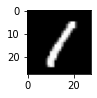

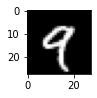

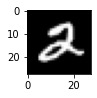

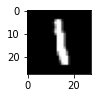

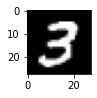

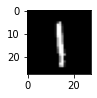

In [8]:
from matplotlib import pyplot
for i in range(9):	
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [9]:
from keras.models import Sequential
model=Sequential()

In [10]:
from keras.layers import Dense, Dropout, LSTM, Conv2D

In [11]:
model.add(LSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128))
#model.conv2D(32)
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)




Epoch 1/10
1875/1875 [==============================] - 20s 7ms/step - loss: 0.5562 - accuracy: 0.8289
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1931 - accuracy: 0.9509
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1431 - accuracy: 0.9622
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1154 - accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1025 - accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0933 - accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0821 - accuracy: 0.9765
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0730 - accuracy: 0.9783
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0696 - accuracy: 0.9798
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 216,426
Trainable params: 216,426
Non-trai

In [13]:
eval_score = model.evaluate(
    x_test,
    y_test,
    verbose=2
)

313/313 - 2s - loss: 0.0499 - accuracy: 0.9895 - 2s/epoch - 5ms/step


TEST  1
actual digit : 0
prediction :  0
TEST  2
actual digit : 6
prediction :  6
TEST  3
actual digit : 8
prediction :  8
TEST  4
actual digit : 1
prediction :  1
TEST  5
actual digit : 6
prediction :  6
MNIST handwritten : 


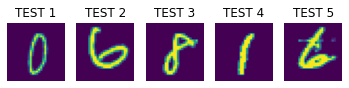

In [23]:
import random
import numpy as np
for i in range(5):
  x=random.random()*10000
  x=int(x)
  pyplot.subplot(1,5,i+1)
  pyplot.axis('off')
  a="TEST "+str(i+1)
  pyplot.title(a)
  pyplot.imshow(x_test[x])
  print("TEST ",i+1)
  print("actual digit :",y_test[x])
  print("prediction : ",model.predict(np.array([x_test[x]])).argmax())
print("MNIST handwritten : ")
